In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import affine_transform
import surfa as sf
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
slice_num=40

In [3]:
path='/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/388_21yrOld_edited_gy-sulc_Output/'

In [4]:
#lh_caudalmiddlefrontal
lh_cmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-caudalmiddlefrontal-reg-nearest.nii')
lh_cmf=lh_cmf_volume.get_fdata()
#lh_frontalpole
lh_fp_volume=nib.load(f'{path}/frontalROI/ctx-lh-frontalpole-reg-nearest.nii')
lh_fp=lh_fp_volume.get_fdata()
#lh_parsorbitalis
lh_po_volume=nib.load(f'{path}/frontalROI/ctx-lh-parsorbitalis-reg-nearest.nii')
lh_po=lh_po_volume.get_fdata()
#lh_precentral
lh_pc_volume=nib.load(f'{path}/frontalROI/ctx-lh-precentral-reg-nearest.nii')
lh_pc=lh_pc_volume.get_fdata()
#lh_rostralmiddlefrontal
lh_rmf_volume=nib.load(f'{path}/frontalROI/ctx-lh-rostralmiddlefrontal-reg-nearest.nii')
lh_rmf=lh_rmf_volume.get_fdata()
#ctx-lh-superiorfronta
lh_sf_volume=nib.load(f'{path}/frontalROI/ctx-lh-superiorfrontal-reg-nearest.nii')
lh_sf=lh_sf_volume.get_fdata()


roi_data=[lh_cmf,lh_fp,lh_po,lh_pc,lh_rmf,lh_sf]
roi_name=['lh_cmf','lh_fp','lh_po','lh_pc','lh_rmf','lh_sf']

In [116]:
lh_p_sp_volume = nib.load(f'{path}/paritalROI/ctx-lh-superiorparietal-reg-nearest.nii')
lh_p_sp = lh_p_sp_volume.get_fdata()
lh_p_ip_volume = nib.load(f'{path}/paritalROI/ctx-lh-inferiorparietal-reg-nearest.nii')
lh_p_ip = lh_p_ip_volume.get_fdata()
lh_p_sm_volume =  nib.load(f'{path}/paritalROI/ctx-lh-supramarginal-reg-nearest.nii')
lh_p_sm = lh_p_sm_volume.get_fdata()
lh_p_pc_volume =  nib.load(f'{path}/paritalROI/ctx-lh-postcentral-reg-nearest.nii')
lh_p_pc = lh_p_pc_volume.get_fdata()
lh_p_pcs_volume =   nib.load(f'{path}/paritalROI/ctx-lh-precuneus-reg-nearest.nii')
lh_p_pcs = lh_p_pcs_volume.get_fdata()

parital_roi_data=[lh_p_sp, lh_p_ip,lh_p_sm, lh_p_pc, lh_p_pcs]
parital_roi_name=['lh_p_sp', 'lh_p_ip','lh_p_sm', 'lh_p_pc', 'lh_p_pcs']

In [117]:
lh_gyri_volume=nib.load(f'{path}lh_gyri-reg-nearest.nii')
lh_gyri=lh_gyri_volume.get_fdata()
lh_sulci_volume=nib.load(f'{path}lh_sulci-reg-nearest.nii')
lh_sulci=lh_sulci_volume.get_fdata()
lh_meancurv_volume=nib.load(f'{path}lh_meancurv_reg.nii')
lh_meancurv=lh_meancurv_volume.get_fdata()


In [118]:
lh_s_precentral_volume = nib.load(f'{path}ctx_lh_S_precentral-reg-nearest.nii')
lh_s_precentral = lh_s_precentral_volume.get_fdata()

lh_g_precentral_volume = nib.load(f'{path}ctx_lh_G_precentral-reg-nearest.nii')
lh_g_precentral = lh_g_precentral_volume.get_fdata()

lh_s_central_volume = nib.load(f'{path}ctx_lh_S_central-reg-nearest.nii')
lh_s_central = lh_s_central_volume.get_fdata()

lh_g_postcentral_volume = nib.load(f'{path}ctx_lh_G_postcentral-reg-nearest.nii')
lh_g_postcentral = lh_g_postcentral_volume.get_fdata()

In [119]:
np.shape(lh_s_central)

(160, 160, 80)

In [121]:
mu_volume=nib.load(f'{path}Mu.nii')
mu_with_csf=mu_volume.get_fdata()

csf_volume=nib.load(f'{path}register_nu_csf.nii')
csf=csf_volume.get_fdata()
csf_mask=(csf < .5).astype(int)
nu_volume=nib.load(f'{path}register_nu.nii')
t1=nu_volume.get_fdata()

In [122]:
mu = mu_with_csf*csf_mask

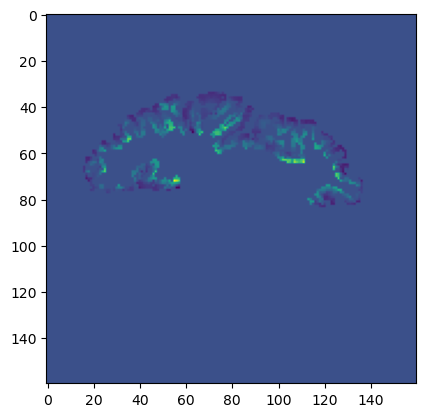

In [123]:
plt.imshow(lh_meancurv[:,:,slice_num])

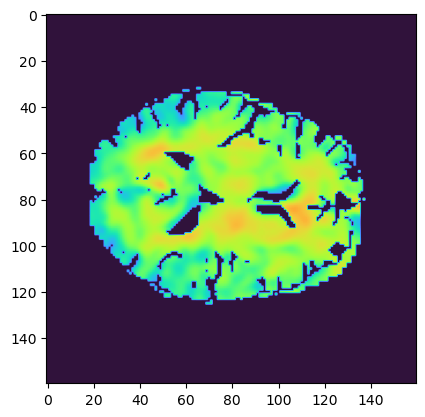

In [124]:
plt.imshow(mu[:,:,slice_num],cmap='turbo',vmin = 0, vmax =6000)

In [125]:
mu_lh_gyri = mu*lh_gyri
meancurv_lh_gyri = lh_meancurv*lh_gyri
mu_lh_sulci = mu*lh_sulci
meancurv_lh_sulci = lh_meancurv*lh_sulci

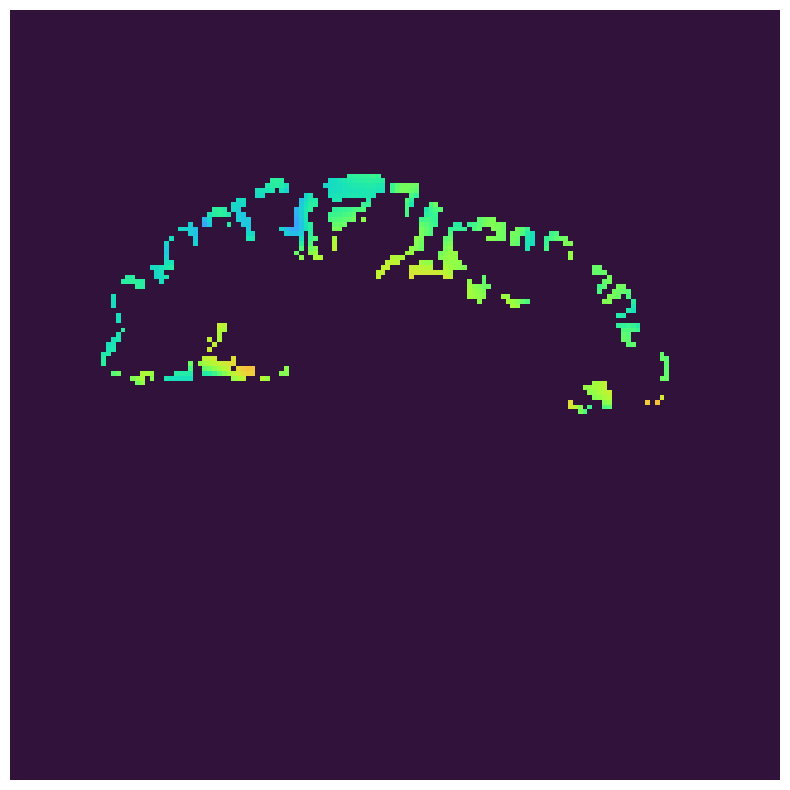

In [126]:
plt.figure(figsize=(10, 10))
plt.imshow(mu_lh_gyri[:,:,slice_num],cmap='turbo',vmin = 0, vmax =6000)
plt.axis('off')
plt.show()

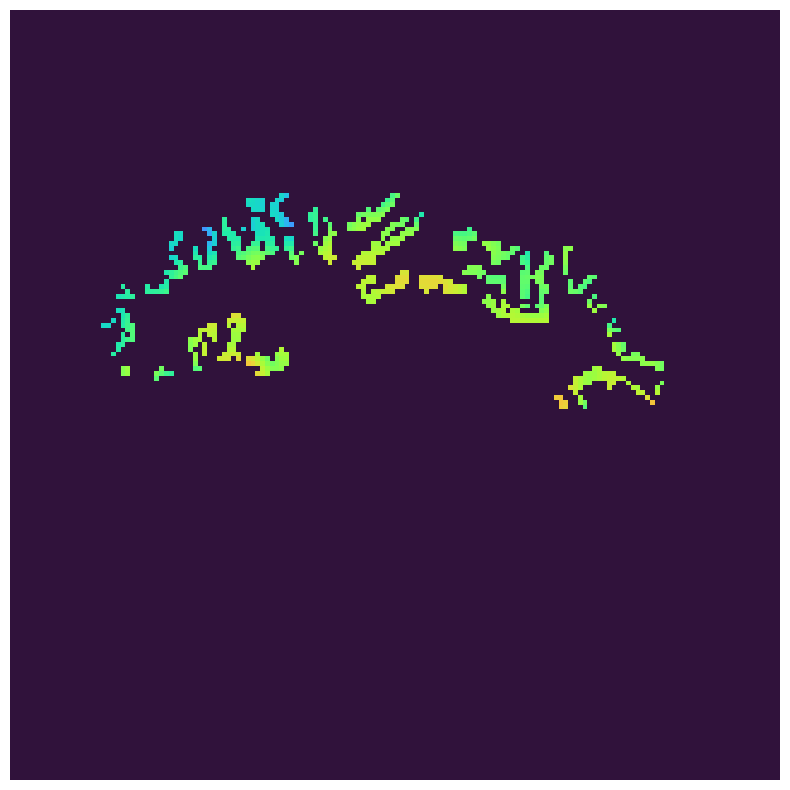

In [127]:
plt.figure(figsize=(10, 10))
plt.imshow(mu_lh_sulci[:,:,slice_num],cmap='turbo',vmin = 0, vmax =6000)
plt.axis('off')
plt.show()

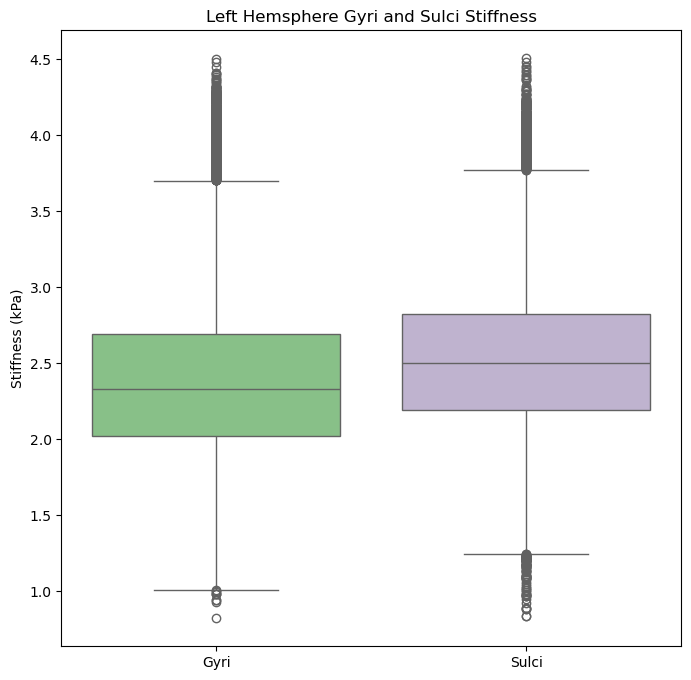

In [128]:
plt.figure(figsize=(8, 8))

mu_lh_gyri_flat = mu_lh_gyri.flatten()
mu_lh_gyri_flat[mu_lh_gyri_flat == 0] = np.nan

mu_lh_sulci_flat = mu_lh_sulci.flatten()
mu_lh_sulci_flat[mu_lh_sulci_flat == 0] = np.nan
sns.boxplot(data=[mu_lh_gyri_flat/1000, mu_lh_sulci_flat/1000], palette='Accent')
plt.xticks([0, 1], ['Gyri', 'Sulci'])
plt.ylabel('Stiffness (kPa)')

plt.title('Left Hemsphere Gyri and Sulci Stiffness')
plt.ylabel('Stiffness (kPa)')
plt.show()


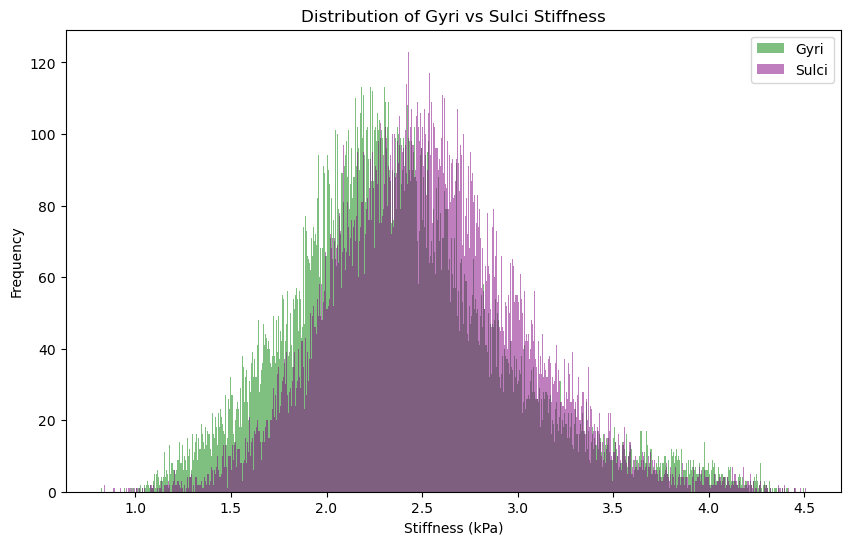

In [129]:
plt.figure(figsize=(10, 6))

plt.hist(mu_lh_gyri_flat/ 1000, bins=1000, alpha=0.5, label='Gyri', color='Green')
plt.hist(mu_lh_sulci_flat/ 1000, bins=1000, alpha=0.5, label='Sulci', color='Purple')

plt.legend(loc='best')
plt.xlabel('Stiffness (kPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')


plt.show()


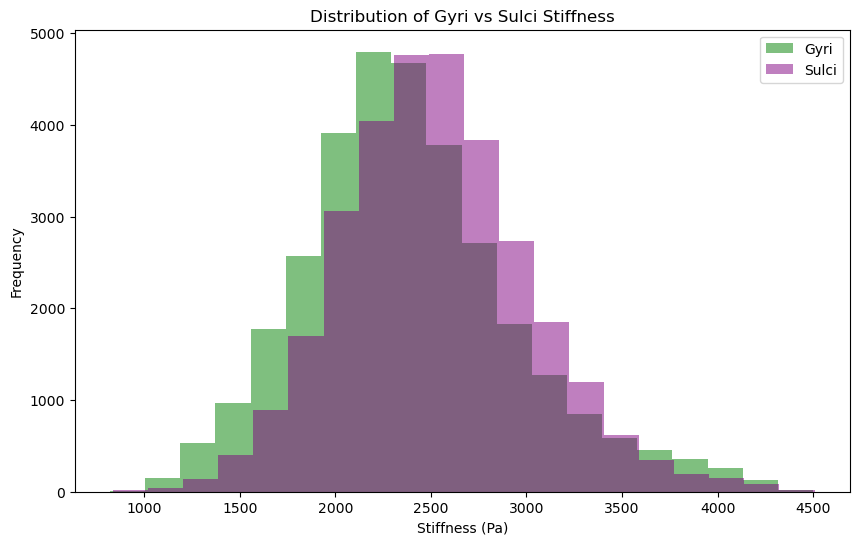

In [18]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(mu_lh_gyri_flat, bins=20, alpha=0.5, label='Gyri', color='Green')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(mu_lh_sulci_flat, bins=20, alpha=0.5, label='Sulci', color='Purple')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

In [19]:
observed = np.round(np.array([gyri_counts,sulci_counts])).astype(int)
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

N = np.sum(observed)
k = min(observed.shape)
v = np.sqrt((chi2_stat) / N*(k-1)) 

print(f"Cramér’s V (Effect Size): {v:.3f}\n")


Chi-Squared Statistic: 1906.4732337514615
P-value: 0.0
Degrees of Freedom: 19
Cramér’s V (Effect Size): 0.175



In [20]:
observed

array([[  10,  145,  526,  970, 1772, 2575, 3916, 4797, 4675, 3779, 2708,
        1834, 1271,  846,  581,  451,  356,  258,  128,   21],
       [  19,   44,  143,  395,  892, 1695, 3065, 4038, 4761, 4777, 3840,
        2734, 1846, 1197,  614,  349,  196,  152,   80,   15]])

In [21]:
ks_statistic, p_value = stats.ks_2samp(mu_lh_gyri_flat, mu_lh_sulci_flat,nan_policy='omit')

In [22]:
p_value

1.0287693224687522e-282

In [23]:
meancurv_lh_gyri_orig = meancurv_lh_gyri
meancurv_lh_gyri[meancurv_lh_gyri == 0] = np.nan
lh_gyri_coor = stats.spearmanr( meancurv_lh_gyri.flatten(),mu_lh_gyri.flatten(),nan_policy='omit')
print(f'Gyri Spearman Corr: {lh_gyri_coor}')

meancurv_lh_sulci_orig = meancurv_lh_sulci
meancurv_lh_sulci[meancurv_lh_sulci == 0] = np.nan
lh_sulci_coor = stats.spearmanr( meancurv_lh_sulci.flatten(),mu_lh_sulci.flatten(),nan_policy='omit')
print(f'Sulci Spearmean Corr: {lh_sulci_coor}')

Gyri Spearman Corr: SignificanceResult(statistic=0.12126710275558727, pvalue=1.0155294628344322e-127)
Sulci Spearmean Corr: SignificanceResult(statistic=0.18346496852774177, pvalue=1.617956035507385e-248)


In [24]:
#mu_lh_gyri_flat_clean = mu_lh_gyri_flat
#mu_lh_sulci_flat_clean = mu_lh_sulci_flat

#mu_lh_gyri_flat_clean[np.isnan(mu_lh_gyri_flat_clean)] = 0
#mu_lh_sulci_flat_clean[np.isnan(mu_lh_sulci_flat_clean)] = 0

In [25]:
160*160*80

2048000

In [26]:
mean_gyri = np.nanmean(mu_lh_gyri_flat)
print(f'gyri:{mean_gyri}')

mean_sulci = np.nanmean(mu_lh_sulci_flat)
print(f'sulci:{mean_sulci}')

gyri:2388.9173858974673
sulci:2527.422040425918


In [27]:
## two-sided t-test
stat, p_value = stats.ttest_ind(mu_lh_gyri_flat, mu_lh_sulci_flat, alternative='two-sided',nan_policy='omit')
p_value

4.114707972025428e-232

In [28]:
## mannwhitneyu 
stat, p_value = stats.mannwhitneyu(mu_lh_gyri_flat, mu_lh_sulci_flat, alternative='two-sided',nan_policy='omit')
p_value 

0.0

In [29]:
mu_lh_gyri.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

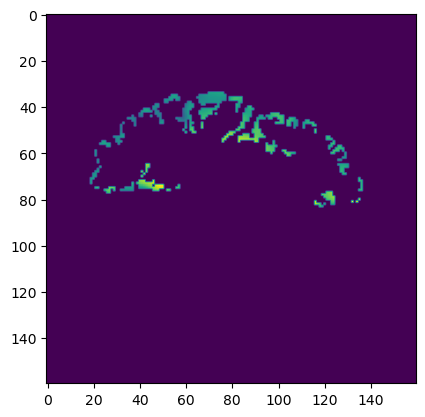

In [30]:
plt.imshow(mu_lh_gyri[:,:,40])

In [31]:
roi_gyri_mu = {}
for i in range(len(roi_data)):
    temp = roi_name[i]
    roi_gyri_mu[temp] = mu_lh_gyri * roi_data[i]

In [32]:
roi_gyri_mu.keys()

dict_keys(['lh_cmf', 'lh_fp', 'lh_po', 'lh_pc', 'lh_rmf', 'lh_sf'])

In [33]:
roi_sulci_mu = {}
for i in range(len(roi_data)):
    temp = roi_name[i]
    roi_sulci_mu[temp] = mu_lh_sulci * roi_data[i]

In [34]:
full_name = ['lh_caudalmiddlefrontal','lh_frontalpole','lh_parsorbitalis','lh_precentral','lh_rostralmiddlefrontal','ctx-lh-superiorfrontal']

In [35]:
for roi in roi_sulci_mu.keys():
    print(f'gyri_{roi}: {np.count_nonzero(roi_gyri_mu[roi])}')
    print(f'sulci_{roi}: {np.count_nonzero(roi_sulci_mu[roi])}')
    print('')

gyri_lh_cmf: 986
sulci_lh_cmf: 768

gyri_lh_fp: 55
sulci_lh_fp: 39

gyri_lh_po: 176
sulci_lh_po: 139

gyri_lh_pc: 1896
sulci_lh_pc: 1654

gyri_lh_rmf: 1551
sulci_lh_rmf: 1732

gyri_lh_sf: 1909
sulci_lh_sf: 2441



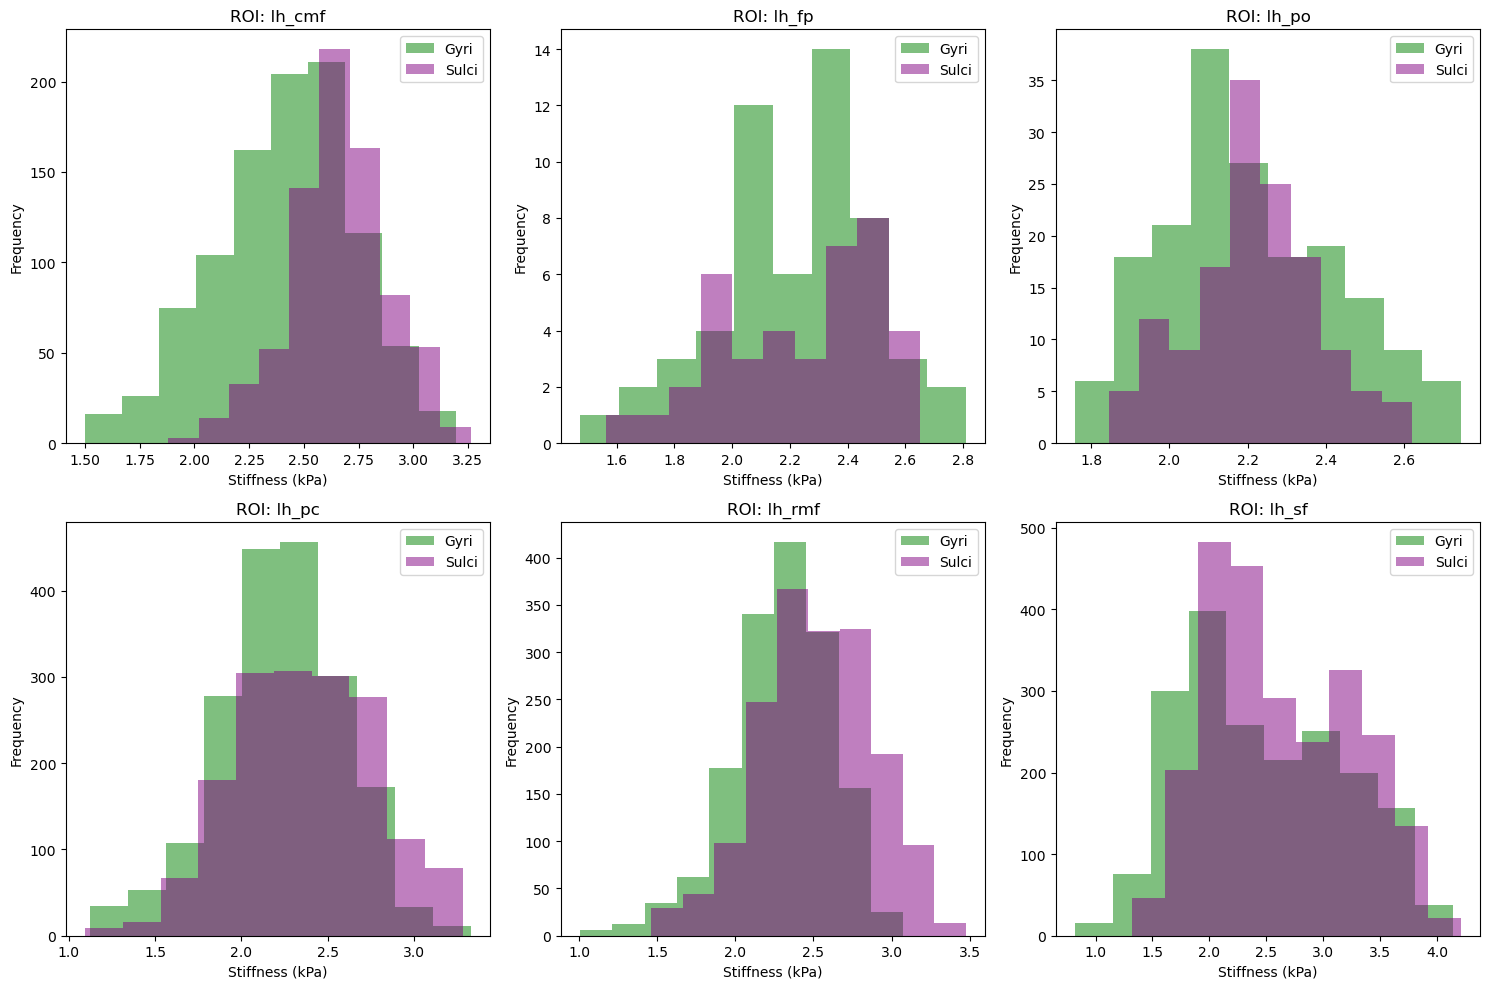

In [36]:
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

axes = axes.flatten()

gyri_counts = []
sulci_counts = []
for idx, roi in enumerate(roi_sulci_mu.keys()):
    if idx < len(axes):
        gyri_flat = roi_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = roi_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan
        
        gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat/1000, bins=10, alpha=0.5, label='Gyri',color='Green')
        sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat/1000, bins=10, alpha=0.5, label='Sulci', color='Purple')

        gyri_counts.append(gyri_count)
        sulci_counts.append(sulci_count)

        axes[idx].legend(loc='best')
        axes[idx].set_xlabel('Stiffness (kPa)')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f"ROI: {roi}")


plt.tight_layout()
plt.show()
                   



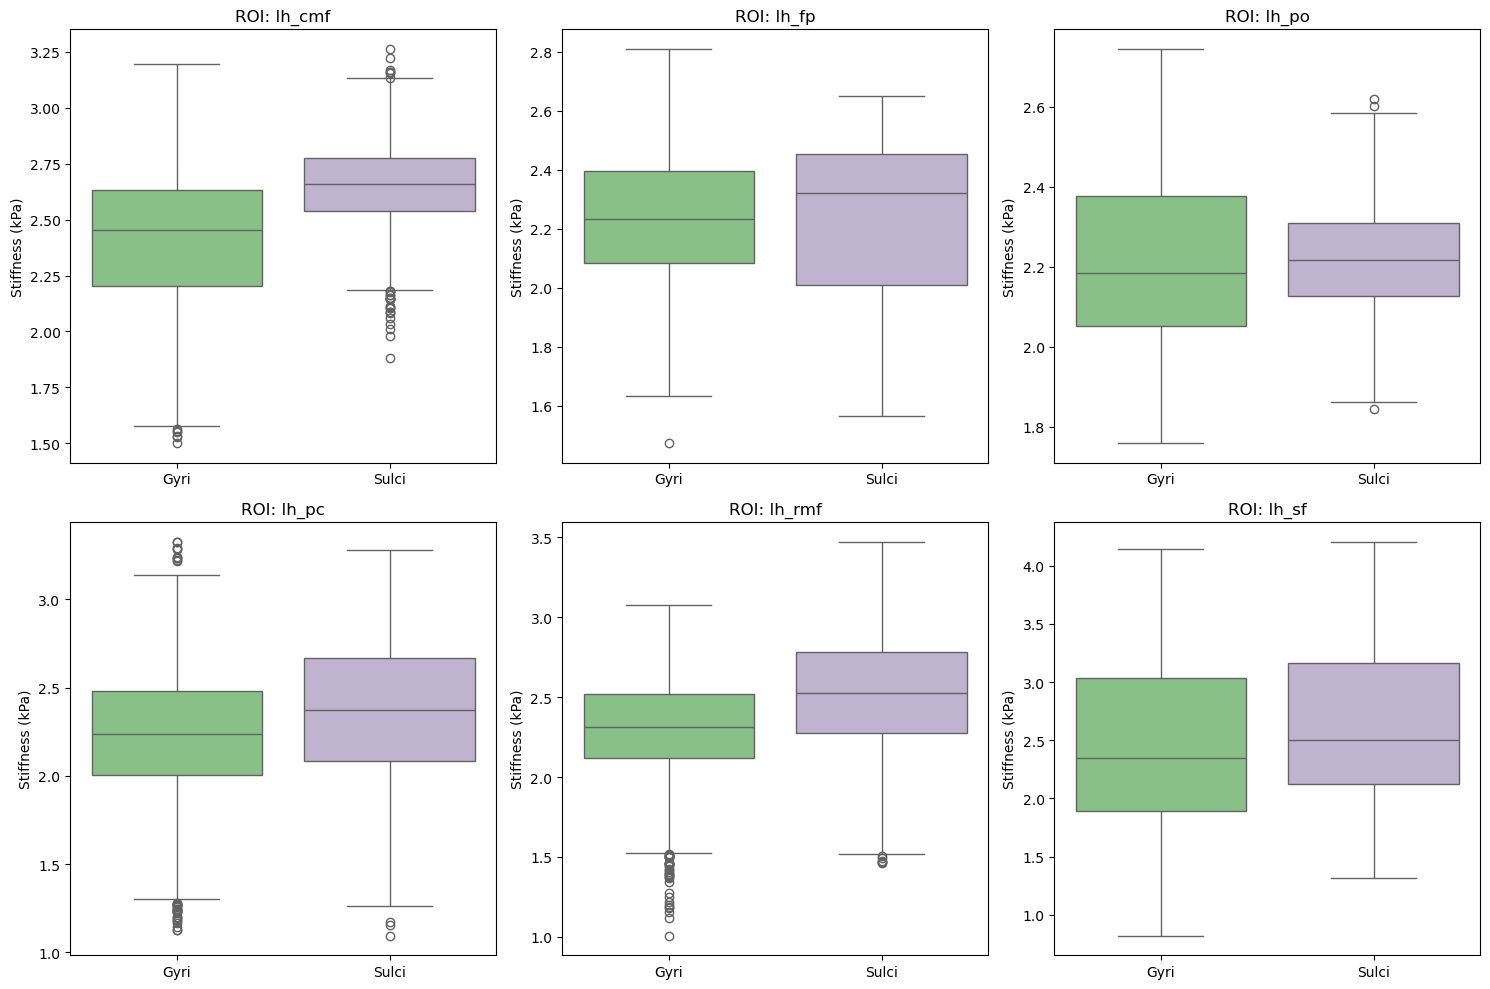

In [37]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

axes = axes.flatten()

for idx, roi in enumerate(roi_sulci_mu.keys()):
    if idx < len(axes):
        # Get flattened data
        gyri_flat = roi_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = roi_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan

        data = [gyri_flat/1000, sulci_flat/1000]

        sns.boxplot(data=data, palette='Accent', ax=axes[idx])

        axes[idx].set_xticklabels(['Gyri', 'Sulci'])
        axes[idx].set_ylabel('Stiffness (kPa)')
        axes[idx].set_title(f"ROI: {roi}")

plt.tight_layout()
plt.show()                      

In [38]:
for idx, roi in enumerate(roi_sulci_mu.keys()):
    print(f"{roi}:")

    roi_gyri_mu[roi][roi_gyri_mu[roi] == 0] = np.nan    
    gyri_flat = roi_gyri_mu[roi].flatten()

    roi_sulci_mu[roi][roi_sulci_mu[roi] == 0] = np.nan
    sulci_flat = roi_sulci_mu[roi].flatten()
    sulci_flat[sulci_flat == 0] = np.nan

    mean_gyri = np.nanmean(gyri_flat)
    mean_sulci = np.nanmean(sulci_flat)
    
    print(f'  gyri_{roi} mean: {mean_gyri}')
    print(f'  sulci_{roi} mean: {mean_sulci}')
    percent_diff = (abs(mean_gyri - mean_sulci) / ((mean_gyri + mean_sulci) / 2)) * 100
    print(f'  percent difference: {percent_diff:.2f}%')

    #observed = np.round(np.array([gyri_counts[idx],sulci_counts[idx]])).astype(int)
    observed = np.array([gyri_counts[idx],sulci_counts[idx]]).astype(int)
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

    N = np.sum(observed) 
    k = min(observed.shape)
    v = np.sqrt((chi2_stat) / N*(k-1)) 

    print(f"  Chi-Squared Statistic: {chi2_stat:.2f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Cramér’s V (Effect Size): {v:.3f}")

    
    ks_statistic, ks_p_value = stats.ranksums(gyri_flat,sulci_flat,nan_policy='omit')
    print(f"  KS P-value = : {ks_p_value}")

    mann_stat, mann_p_value = stats.mannwhitneyu(gyri_flat, sulci_flat, alternative='two-sided',nan_policy='omit')
    print(f"  Mann Whitney P-value = : {mann_p_value}")

    sucli_roi_meancurv = roi_data[idx]*meancurv_lh_sulci_orig
    sucli_roi_meancurv[sucli_roi_meancurv == 0] = np.nan
    sucli_roi_meancurv_flat = sucli_roi_meancurv.flatten()
    
    gyri_roi_meancurv = roi_data[idx]*meancurv_lh_gyri_orig
    gyri_roi_meancurv[gyri_roi_meancurv == 0] = np.nan
    gyri_roi_meancurv_flat = gyri_roi_meancurv.flatten()

    
    sulci_coor,sulci_sm_pvalue = stats.spearmanr(sucli_roi_meancurv_flat,roi_sulci_mu[roi].flatten() ,nan_policy='omit')
    print (f"  Spearmann Sulci Corr: {sulci_coor}")
    gyri_coor,gyri_sm_pvalue = stats.spearmanr(gyri_roi_meancurv_flat,roi_gyri_mu[roi].flatten() ,nan_policy='omit')
    print (f"  Spearmann Gyri Corr: {gyri_coor}")
    
    print('')

lh_cmf:
  gyri_lh_cmf mean: 2417.4232510510924
  sulci_lh_cmf mean: 2657.950473057435
  percent difference: 9.48%
  Chi-Squared Statistic: 36.56
  P-value: 0.000032
  Cramér’s V (Effect Size): 0.144
  KS P-value = : 5.937491470750691e-62
  Mann Whitney P-value = : 5.942195793297527e-62
  Spearmann Sulci Corr: 0.2912566974118756
  Spearmann Gyri Corr: 0.3931653927847688

lh_fp:
  gyri_lh_fp mean: 2228.6784871013833
  sulci_lh_fp mean: 2235.2026430807914
  percent difference: 0.29%
  Chi-Squared Statistic: 14.56
  P-value: 0.103897
  Cramér’s V (Effect Size): 0.394
  KS P-value = : 0.8149434986544652
  Mann Whitney P-value = : 0.8179235493401322
  Spearmann Sulci Corr: 0.27146620290600726
  Spearmann Gyri Corr: -0.05689443697616112

lh_po:
  gyri_lh_po mean: 2205.255278181677
  sulci_lh_po mean: 2210.6050219100885
  percent difference: 0.24%
  Chi-Squared Statistic: 14.80
  P-value: 0.096699
  Cramér’s V (Effect Size): 0.217
  KS P-value = : 0.3844979778253118
  Mann Whitney P-value = : 

In [39]:
lh_g_precentral_mu = lh_g_precentral*mu
lh_s_precentral_mu = lh_s_precentral*mu
print(f'precentral gyri:{np.count_nonzero(lh_g_precentral_mu)}')
print(f'precentral sulci:{np.count_nonzero(lh_s_precentral_mu)}')

lh_s_central_mu = lh_s_central*mu
print(f'central sulci:{np.count_nonzero(lh_s_central_mu)}')
lh_g_postcentral_mu = lh_g_postcentral*mu
print(f'postcentral gyri:{np.count_nonzero(lh_g_postcentral_mu)}')

precentral gyri:1550
precentral sulci:1078
central sulci:965
postcentral gyri:1082


In [55]:
lh_g_precentral_mu[lh_g_precentral_mu == 0] = np.nan
lh_s_precentral_mu[lh_s_precentral_mu == 0] = np.nan
lh_s_central_mu[lh_s_central_mu == 0] = np.nan
lh_g_postcentral_mu[lh_g_postcentral_mu == 0] = np.nan

lh_g_precentral_flat = lh_g_precentral_mu.flatten()
lh_s_precentral_flat = lh_s_precentral_mu.flatten()
lh_s_central_flat = lh_s_central_mu.flatten()
lh_g_postcentral_flat = lh_g_postcentral_mu.flatten()

In [61]:
lh_s_precentral_mean = np.nanmean(lh_s_precentral_mu)
lh_g_precentral_mean = np.nanmean(lh_g_precentral_mu)
print (f'precentral sulci mean: {lh_s_precentral_mean}')
print (f'precentral gyri mean: {lh_g_precentral_mean}')

percent_diff = (abs(lh_g_precentral_mean - lh_s_precentral_mean) / ((lh_g_precentral_mean + lh_s_precentral_mean) / 2)) * 100
print(f'precentral percent difference: {percent_diff:.2f}%')

lh_g_postcentral_mean = np.nanmean(lh_g_postcentral_mu)
lh_s_central_mean = np.nanmean(lh_s_central_mu)
print (f'central sulci mean: {lh_s_central_mean}')
print (f'postcentral gyri mean: {lh_g_postcentral_mean}')

precentral sulci mean: 2345.583687721646
precentral gyri mean: 2184.1379735832984
precentral percent difference: 7.13%
central sulci mean: 2175.209005963549
postcentral gyri mean: 2260.2656917507375


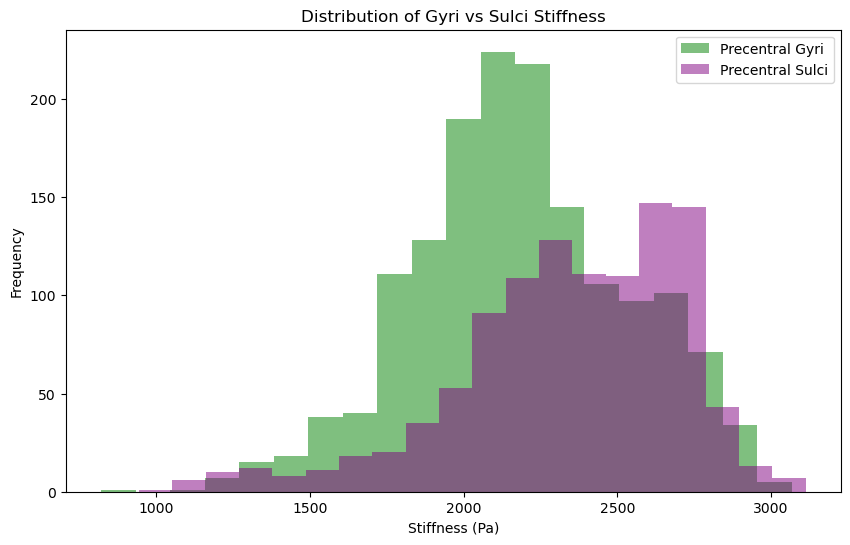

In [57]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(lh_g_precentral_flat, bins=20, alpha=0.5, label='Precentral Gyri', color='Green')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(lh_s_precentral_flat, bins=20, alpha=0.5, label='Precentral Sulci', color='Purple')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

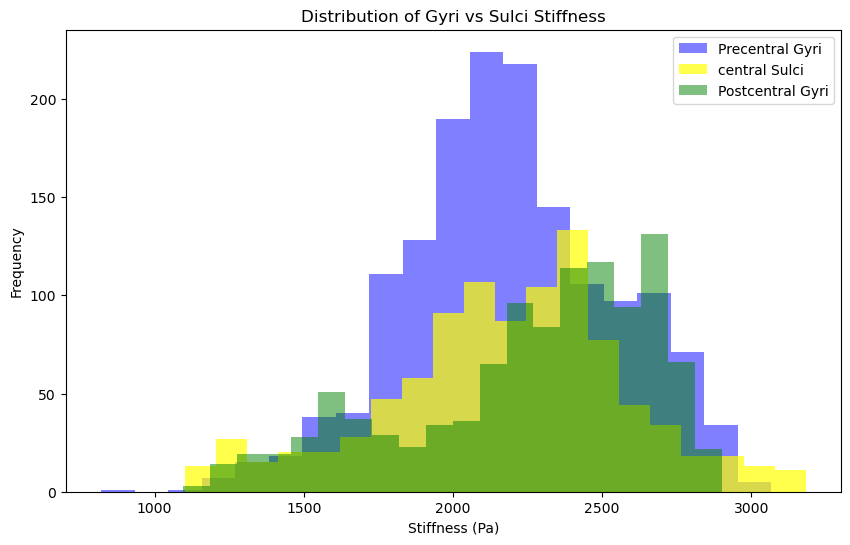

In [62]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(lh_g_precentral_flat, bins=20, alpha=0.5, label='Precentral Gyri', color='Blue')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(lh_s_central_flat, bins=20, alpha=0.7, label='central Sulci', color='Yellow')

post_gyri_counts, post_gyri_bin_edges, post_gyri_patches =plt.hist(lh_g_postcentral_flat, bins=20, alpha=0.5, label='Postcentral Gyri', color='Green')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

In [44]:
pc_mann_stat, pc_mann_p_value = stats.mannwhitneyu(lh_g_precentral_flat, lh_s_precentral_flat, alternative='two-sided',nan_policy='omit')
print(f" Mann Whitney P-value = : {pc_mann_p_value}")

 Mann Whitney P-value = : 2.397216564147417e-37


In [45]:
observed = np.array([gyri_counts,sulci_counts]).astype(int)
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.6f}")

Chi-Squared Statistic: 160.66
P-value: 0.000000


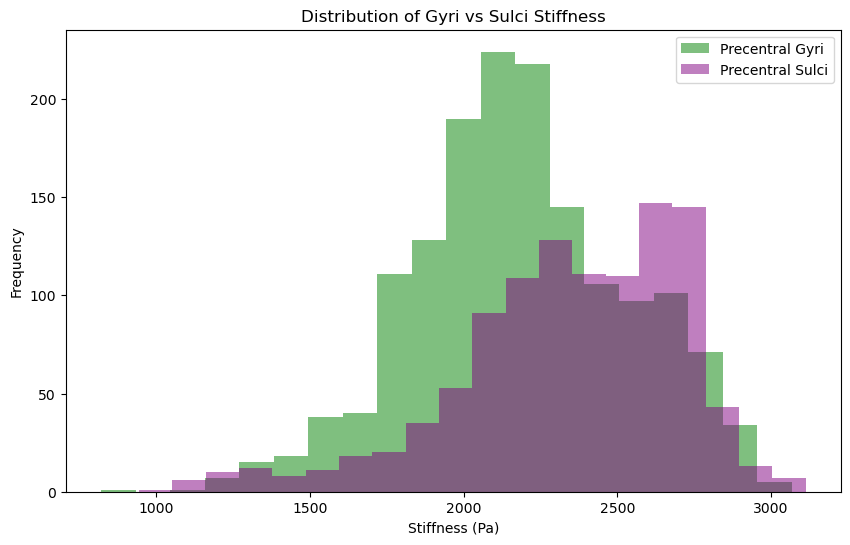

In [46]:
plt.figure(figsize=(10, 6))
gyri_counts, gyri_bin_edges, gyri_patches =plt.hist(lh_g_precentral_flat, bins=20, alpha=0.5, label='Precentral Gyri', color='Green')
sulci_counts, sulci_bin_edges, sulci_patches=plt.hist(lh_s_precentral_flat, bins=20, alpha=0.5, label='Precentral Sulci', color='Purple')
plt.legend(loc='best')
plt.xlabel('Stiffness (Pa)')
plt.ylabel('Frequency')
plt.title('Distribution of Gyri vs Sulci Stiffness')
plt.show()

In [108]:
parital_roi_gyri_mu = {}
for i in range(len(parital_roi_data)):
    temp = parital_roi_name[i]
    parital_roi_gyri_mu[temp] = mu_lh_gyri * parital_roi_data[i]

parital_roi_sulci_mu = {}
for i in range(len(parital_roi_data)):
    temp = parital_roi_name[i]
    parital_roi_sulci_mu[temp] = mu_lh_sulci * parital_roi_data[i]

In [109]:
parital_roi_sulci_mu.keys()

dict_keys(['lh_p_sp', 'lh_p_ip', 'lh_p_sm', 'lh_p_pc', 'lh_p_pcs'])

In [111]:
for roi in parital_roi_sulci_mu.keys():
    print(f'gyri_{roi}: {np.count_nonzero(parital_roi_gyri_mu[roi])}')
    print(f'sulci_{roi}: {np.count_nonzero(parital_roi_sulci_mu[roi])}')
    print('')

gyri_lh_p_sp: 1178
sulci_lh_p_sp: 1562

gyri_lh_p_ip: 1326
sulci_lh_p_ip: 1444

gyri_lh_p_sm: 1775
sulci_lh_p_sm: 1806

gyri_lh_p_pc: 1420
sulci_lh_p_pc: 1208

gyri_lh_p_pcs: 1414
sulci_lh_p_pcs: 1322



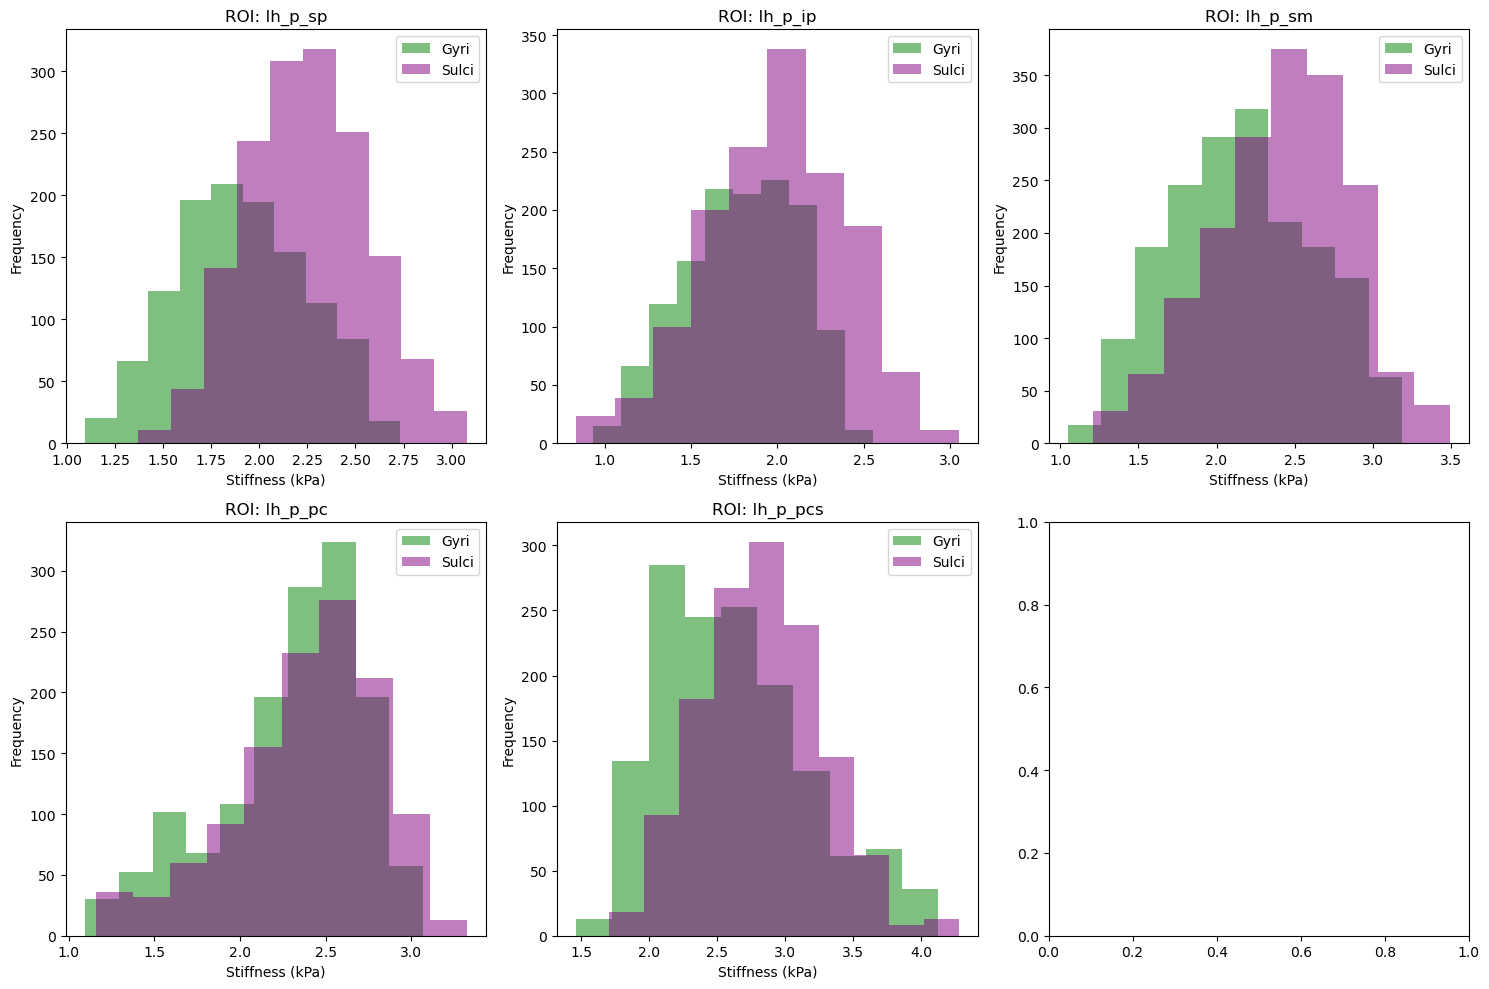

In [110]:
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

axes = axes.flatten()

gyri_counts = []
sulci_counts = []
for idx, roi in enumerate(parital_roi_sulci_mu.keys()):
    if idx < len(axes):
        gyri_flat = parital_roi_gyri_mu[roi].flatten()
        gyri_flat[gyri_flat == 0] = np.nan

        sulci_flat = parital_roi_sulci_mu[roi].flatten()
        sulci_flat[sulci_flat == 0] = np.nan
        
        gyri_count, gyri_bin_edges, gyri_patches = axes[idx].hist(gyri_flat/1000, bins=10, alpha=0.5, label='Gyri',color='Green')
        sulci_count, sulci_bin_edges, sulci_patches = axes[idx].hist(sulci_flat/1000, bins=10, alpha=0.5, label='Sulci', color='Purple')

        gyri_counts.append(gyri_count)
        sulci_counts.append(sulci_count)

        axes[idx].legend(loc='best')
        axes[idx].set_xlabel('Stiffness (kPa)')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f"ROI: {roi}")


plt.tight_layout()
plt.show()
                  